<a href="https://colab.research.google.com/github/akshat0522/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**    - Akshat Mishra

# **Project Summary -**

### **Introduction**
Yes Bank, a prominent player in the Indian financial sector, has been a focal point in the news since 2018 due to a high-profile fraud case involving Rana Kapoor. This event has had a significant impact on the bank's stock prices, making it an intriguing subject for financial analysis and prediction. The primary goal of this project is to predict Yes Bank's monthly closing stock price using a linear regression model.<br>
### **Dataset**
We have used the yes bank stock price dataset. This dataset contains 5 different features that can be used for predicting close price of the stock. These features are -
1. Date
2. Open
3. High
4. Low
5. Close

### **Objective**
The main objective of this project is to predict the stocks' closing price for each month using a linear regression model.
### **Methodology**
1. Data Preparation and Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Selection
4. Modeling
5. Evaluation

### **Conclusion**
The project aims to demonstrate the applicability of Linear Regression model in financial forcasing.







# **GitHub Link -**

https://github.com/akshat0522/Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**


**Yes Bank, a significant entity in the Indian financial sector, has experienced notable fluctuations in its stock prices, particularly since 2018 due to a high-profile fraud case involving its founder, Rana Kapoor. These fluctuations pose a challenge for investors and analysts aiming to predict future stock prices accurately. The objective of this project is to develop a predictive model that can forecast the monthly closing stock price of Yes Bank.**

**The main goal is to determine whether a linear regression model can effectively predict the closing stock prices of Yes Bank, thus providing valuable insights and potential forecasting tools for investors and financial analysts.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4 : Machine Learning/Capstone Project Regression/data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [7]:
# Detaset Statistics
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [8]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


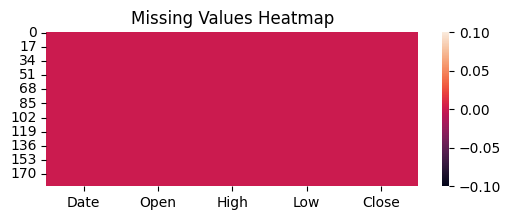

In [11]:
# Visualizing the missing values
plt.figure(figsize=(6, 2))
sns.heatmap(data.isnull())
plt.title('Missing Values Heatmap')
plt.show()

**The absence of color variation in the heatmap indicates that there are no null values in the DataFrame. All values are present, which is why the entire heatmap shows a uniform color.**

### What did you know about your dataset?

### Insights from the info() method -
*   The DataFrame has no missing values (nulls) in any of the columns, which means we don't to treat missing values.
*   The "Date column" contains data in an object format, which suggests it might need to be converted to a datetime format for analysis.
*   The other columns (Open, High, Low, Close) are numerical which are suitable for stock price analysis.

### Insights from the describe() method -
*   The data for all columns showing a wide range, and standard deviation is also high which means there is high valatility in the prices.
*   As the mean is higher than the median for all columns, which suggest a skew in the data distribution.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [13]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

**There are 5 variables -**
1. **Date** - Date of the record. Data type is object need to change into datetime.
2. **Open** - opening price of the share/stock (Numerical)
3. **High** - Highest price of the share for that day (Numerical)
4. **Low** - Lowest Price of the share for that day (Numerical)
5. **Close** - Closing price of the share for that day (Numerical)

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
data.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# Converting datatype of 'Date' column from string to datetime.
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [16]:
# Checking if the 'Date' column looks different from earlier
data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [17]:
# Checking the Datatype of the 'Date' Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [18]:
# Extracting year from 'Date' column and creating a seperate column for Year
data['Year'] = data['Date'].dt.year

In [19]:
# Extracting month from 'Date' column and creating a seperate column for Month
data['Month'] = data['Date'].dt.month

In [20]:
# Checking for the new column 'Year'
data.head()

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


In [21]:
# Defining Dependent & Independent variables for further implementations
dependent_variable = 'Close'
independent_variables = ['Open', 'High', 'Low']

### What all manipulations have you done and insights you found?



*   I have changed datatype of 'Date' column from string to datetime.
*   Extracted the year & month from date column and created a new column named 'Year' & 'Month' for future needs.
*   Divided the columns in independent and dependent variables for further implementations.
*   There are no null values and duplicate values. Data is clean and ready for vizualization. Mean is higher in numerical columns which indicate possibility of skewness in the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Distribution of 'Open' Variable)

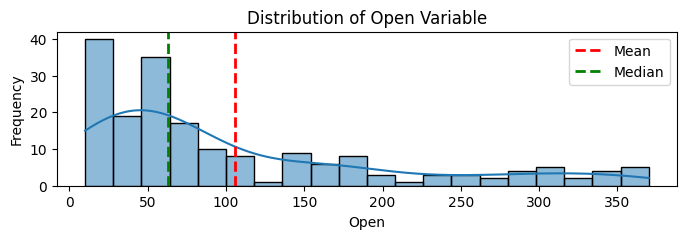

In [22]:
# Chart - 1 Visualization Code
# Distribution of Open Variable along with mean and median line
plt.figure(figsize=(8, 2))
sns.histplot(data['Open'], bins=20, kde=True)

plt.axvline(data['Open'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['Open'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Open Variable')
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.legend()
plt.show()

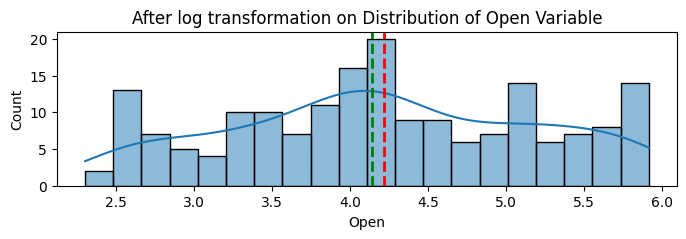

In [81]:
# Applying log transformation because it has right skewed distribution.
plt.figure(figsize=(8, 2))
sns.histplot(np.log(data['Open']), bins=20, kde=True)

plt.axvline(np.log(data['Open']).mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.log(data['Open']).median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('After log transformation on Distribution of Open Variable')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of 'Open' Variable

##### 2. What is/are the insight(s) found from the chart?

I came to know that Distrubution is skewed and needs transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After log transformation, the distribution has become close to normal distribution.

#### Chart - 2 (Distribution of 'Close' Variable)

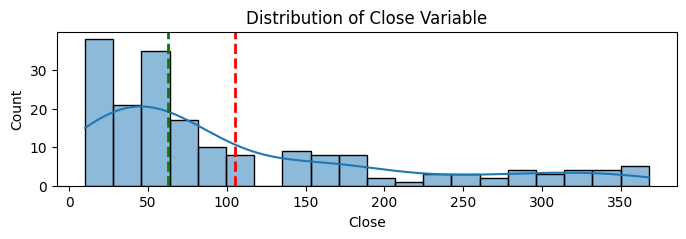

In [75]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 2))
sns.histplot(data['Close'], bins=20, kde=True)

plt.axvline(data['Close'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['Close'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Close Variable')
plt.show()

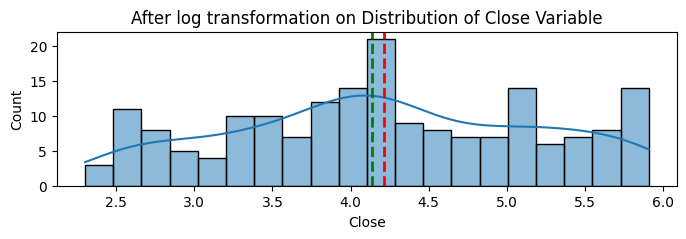

In [80]:
# Applying log transformation because of the skewness in the distribution.
plt.figure(figsize=(8, 2))
sns.histplot(np.log(data['Close']), bins=20, kde=True)

plt.axvline(np.log(data['Close']).mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.log(data['Close']).median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('After log transformation on Distribution of Close Variable')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of 'Close' Variable

##### 2. What is/are the insight(s) found from the chart?

I came to know that Distrubution is skewed and needs transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After log transformation, the distribution has become close to normal distribution.

#### Chart - 3

In [26]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 4

In [27]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Answer Here

#### Chart - 5

In [28]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [29]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

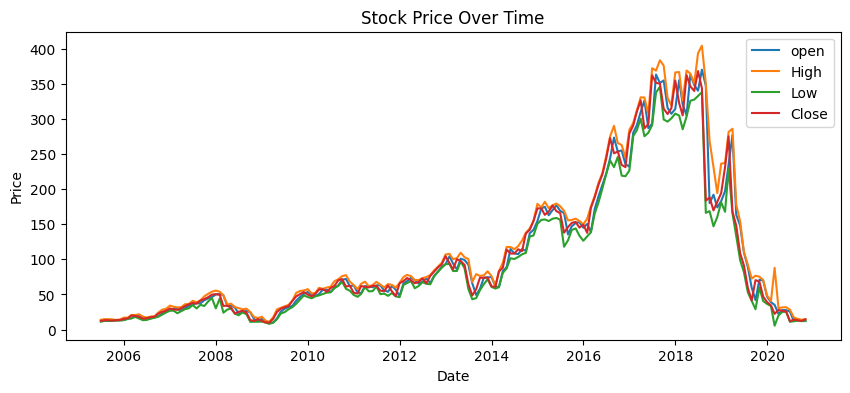

In [30]:
# Chart - 1 visualization code
plt.figure(figsize=(10,4))
plt.plot(data['Date'] , data['Open'] , label = 'open')
plt.plot(data['Date'] , data['High'] , label = 'High')
plt.plot(data['Date'] , data['Low'], label = 'Low')
plt.plot(data['Date'] , data['Close'], label = 'Close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()


#### Chart - 7

In [31]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [32]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [33]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [34]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [35]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [36]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [37]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [38]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [39]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [43]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [44]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [45]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [46]:
# Expand Contraction

#### 2. Lower Casing

In [47]:
# Lower Casing

#### 3. Removing Punctuations

In [48]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [49]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [50]:
# Remove Stopwords

In [51]:
# Remove White spaces

#### 6. Rephrase Text

In [52]:
# Rephrase Text

#### 7. Tokenization

In [53]:
# Tokenization

#### 8. Text Normalization

In [54]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [55]:
# POS Taging

#### 10. Text Vectorization

In [56]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [57]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [58]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [59]:
# Transform Your data

### 6. Data Scaling

In [60]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [61]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [62]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [63]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [64]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [69]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [72]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [73]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***